In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))
display(HTML("<style>.output_result { max-width:100% !important; }</style>"))
display(HTML("<style>.prompt { display:none !important; }</style>"))

# Decision trees

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Intro" data-toc-modified-id="Intro-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Intro</a></span></li><li><span><a href="#The-problem" data-toc-modified-id="The-problem-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>The problem</a></span></li><li><span><a href="#Data-exploration" data-toc-modified-id="Data-exploration-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Data exploration</a></span></li><li><span><a href="#Train-test-splitting" data-toc-modified-id="Train-test-splitting-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Train test splitting</a></span></li><li><span><a href="#Models" data-toc-modified-id="Models-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Models</a></span><ul class="toc-item"><li><span><a href="#Baseline-model" data-toc-modified-id="Baseline-model-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Baseline model</a></span></li><li><span><a href="#Simple-tree-(depth=1)" data-toc-modified-id="Simple-tree-(depth=1)-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Simple tree (depth=1)</a></span></li><li><span><a href="#Bigger-tree-(depth=3)" data-toc-modified-id="Bigger-tree-(depth=3)-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>Bigger tree (depth=3)</a></span></li><li><span><a href="#Huge-tree-(depth=20)" data-toc-modified-id="Huge-tree-(depth=20)-5.4"><span class="toc-item-num">5.4&nbsp;&nbsp;</span>Huge tree (depth=20)</a></span></li><li><span><a href="#Overfitting" data-toc-modified-id="Overfitting-5.5"><span class="toc-item-num">5.5&nbsp;&nbsp;</span>Overfitting</a></span></li><li><span><a href="#Other-hyperparameters" data-toc-modified-id="Other-hyperparameters-5.6"><span class="toc-item-num">5.6&nbsp;&nbsp;</span>Other hyperparameters</a></span></li><li><span><a href="#Grid-search" data-toc-modified-id="Grid-search-5.7"><span class="toc-item-num">5.7&nbsp;&nbsp;</span>Grid search</a></span></li></ul></li><li><span><a href="#Feature-importance" data-toc-modified-id="Feature-importance-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Feature importance</a></span></li><li><span><a href="#Summary" data-toc-modified-id="Summary-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Summary</a></span></li></ul></div>

In [2]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

# Introduction

As an example, do you remember the Titanic dataset? We are going to create a predictor of who will die following a decision tree. A decision tree tries to predict the value "Survived" (as a Yes/No) using the following approach:

<img src="https://www.researchgate.net/profile/Joop_Hox/publication/317307818/figure/fig2/AS:633029202571264@1527937331016/Decision-tree-on-Titanic-survival-data-Source-https-en_Q640.jpg" width=300>

Decision trees:
 * are used **both** for regression and classification,
 * involve stratifying (segmenting) the prediction stage,
 * act an iterative manner,
 * have this name because splitting rules are represented in a tree.
 * work really well with non-linear data.

Addiionally, decision trees:
 * are simple
 * are useful for interpretation
 * alone, are not very powerful predictors but...
 * ...give rise to more complex models, like Random Forest or Gradient Boosted Trees algorithms.

# The problem

Today we will be using a **white wine** dataset. Experts have rated several wines, whose physical properties are also given.

In [3]:
df = pd.read_csv("../data/wine_quality.csv")

In [4]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


## What do we want to do?
 * predict the quality of the wine base on the other properties.
 
To do that, we are going to:
 * build a **supervised** learning model...
 * ...which is a **regression** model (predict quantitative feature) and...
 * ...that tries to predict wine `quality` from its physical properties

We will do train-test splitting for correct asessment of model performance.

We will use MSE metric: Mean Squared Error $$MSE=\frac{1}{N}\sum(\hat{y} - y)^2$$

In [5]:
from sklearn.metrics import mean_squared_error

To study which model is the best, we will:
 * try several models and...
 * ...keep the one with the **least** MSE on **test set** (i.e., the least test error)
 * ...we will show what happens with training error.

## Data exploration

In [6]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

<AxesSubplot:xlabel='quality', ylabel='count'>

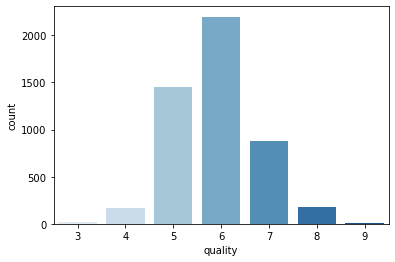

In [7]:
sns.countplot(x=df.quality, palette='Blues')

In [8]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


In [9]:
len(df.columns)

12

In [10]:
# Importante
# Los decision trees no pueden ser entrenados con datos faltantes (NaNs - None - Null)

df.isna().sum()

# si todas las columnas suman 0, quiere decir que no falta ningún dato.

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

## Train-test splitting

Supervised machine learning is about creating models that accurately map the given **inputs** to the given **outputs**.

What’s most important to understand is that you usually need, assess the predictive performance of your model, and validate the model.

Because you need unbiased evaluation to properly use these models, it means that you can’t evaluate the predictive performance of a model with the same data you used for training. 
It's like studying a few pages from a book and just taking the test for those pages, when you should take the test for the whole book.

You need evaluate the model with fresh data that hasn’t been seen by the model before. You can accomplish that by splitting your dataset before you use it.

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
# Cojo las variables independientes: coger todas las columnas menos la "objetivo" (quality)
X = df.drop("quality", axis=1)

# Cojo la variable quality solamente
y = df['quality']

In [13]:
# las variables que uso para predecir la calidad del vino
X

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9
...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8


In [14]:
# la variable que quiero predecir (mi target/output)
y

0       6
1       6
2       6
3       6
4       6
       ..
4893    6
4894    5
4895    6
4896    7
4897    6
Name: quality, Length: 4898, dtype: int64

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=666)

In [16]:
X_train.shape

(3918, 11)

In [17]:
X_test.shape

(980, 11)

In [18]:
y_train.shape

(3918,)

In [19]:
y_test.shape

(980,)

In [20]:
y_test

367     6
1939    5
3475    6
4630    7
209     6
       ..
1452    6
2993    7
295     6
37      6
1666    5
Name: quality, Length: 980, dtype: int64

## Models

We need to create several models to see which one is the best. And how do we know "the best"? We compare the models to a *baseline* case.

We will change the maximum depth of a tree to explore different models

### Baseline model

The baseline model is predicting **just** the mean, to ask the question: "Can we do better than the average value?"

In [21]:
baseline = y_train.mean()
baseline

5.8894844308320575

Train error

In [22]:
((y_train - baseline) ** 2).mean()

0.7782406223967026

Test error

In [23]:
((y_test - baseline) ** 2).mean()

0.8086727340637989

### Simple tree (depth=1)

In [24]:
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
# Solo usamos DecisionTreeRegressor, porque nuestra variable 'quality' es numérica;
# si fuese categórica, usaríamos DecisionTreeClassifier.

In [25]:
model = DecisionTreeRegressor(max_depth=1)

In [26]:
model.fit(X=X_train, y=y_train)

DecisionTreeRegressor(max_depth=1)

In [27]:
# Train error

# comparacion de los valores que debería predecir (y_true) con respecto 
# a lo que está prediciendo (y_pred)

mean_squared_error(
    y_true=y_train, 
    y_pred=model.predict(X_train)
)

0.6511398839609709

In [28]:
# Test error

mean_squared_error(
    y_true=y_test, 
    y_pred=model.predict(X_test)
)

0.685559553685101

In [29]:
from sklearn.tree import plot_tree

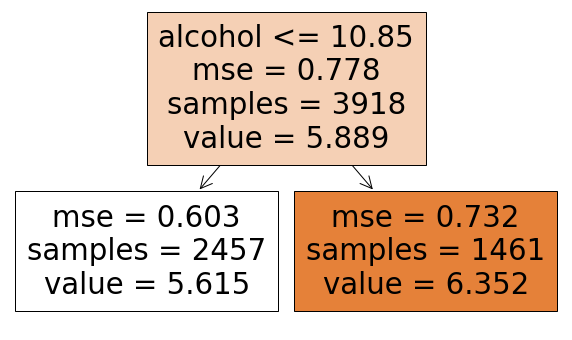

In [30]:
fig = plt.figure(figsize=(10,6))

# en feature_names cojo todas las columnas menos la 
# última (quality) que es la que quiero predecir
plot_tree(model, feature_names=df.columns[:-1], filled=True);

In [31]:
X_train.shape

(3918, 11)

### Bigger tree (depth=3)

In [32]:
model = DecisionTreeRegressor(max_depth=3)

In [33]:
model.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=3)

In [34]:
# Train error

mean_squared_error(
    y_true=y_train, 
    y_pred=model.predict(X_train)
)

# valor anterior (max_depth=1): 0.6511398839609709

0.5598058565365571

In [35]:
# Test error

mean_squared_error(
    y_true=y_test, 
    y_pred=model.predict(X_test)
)

# valor anterior (max_depth=1): 0.685559553685101

0.5831944046394488

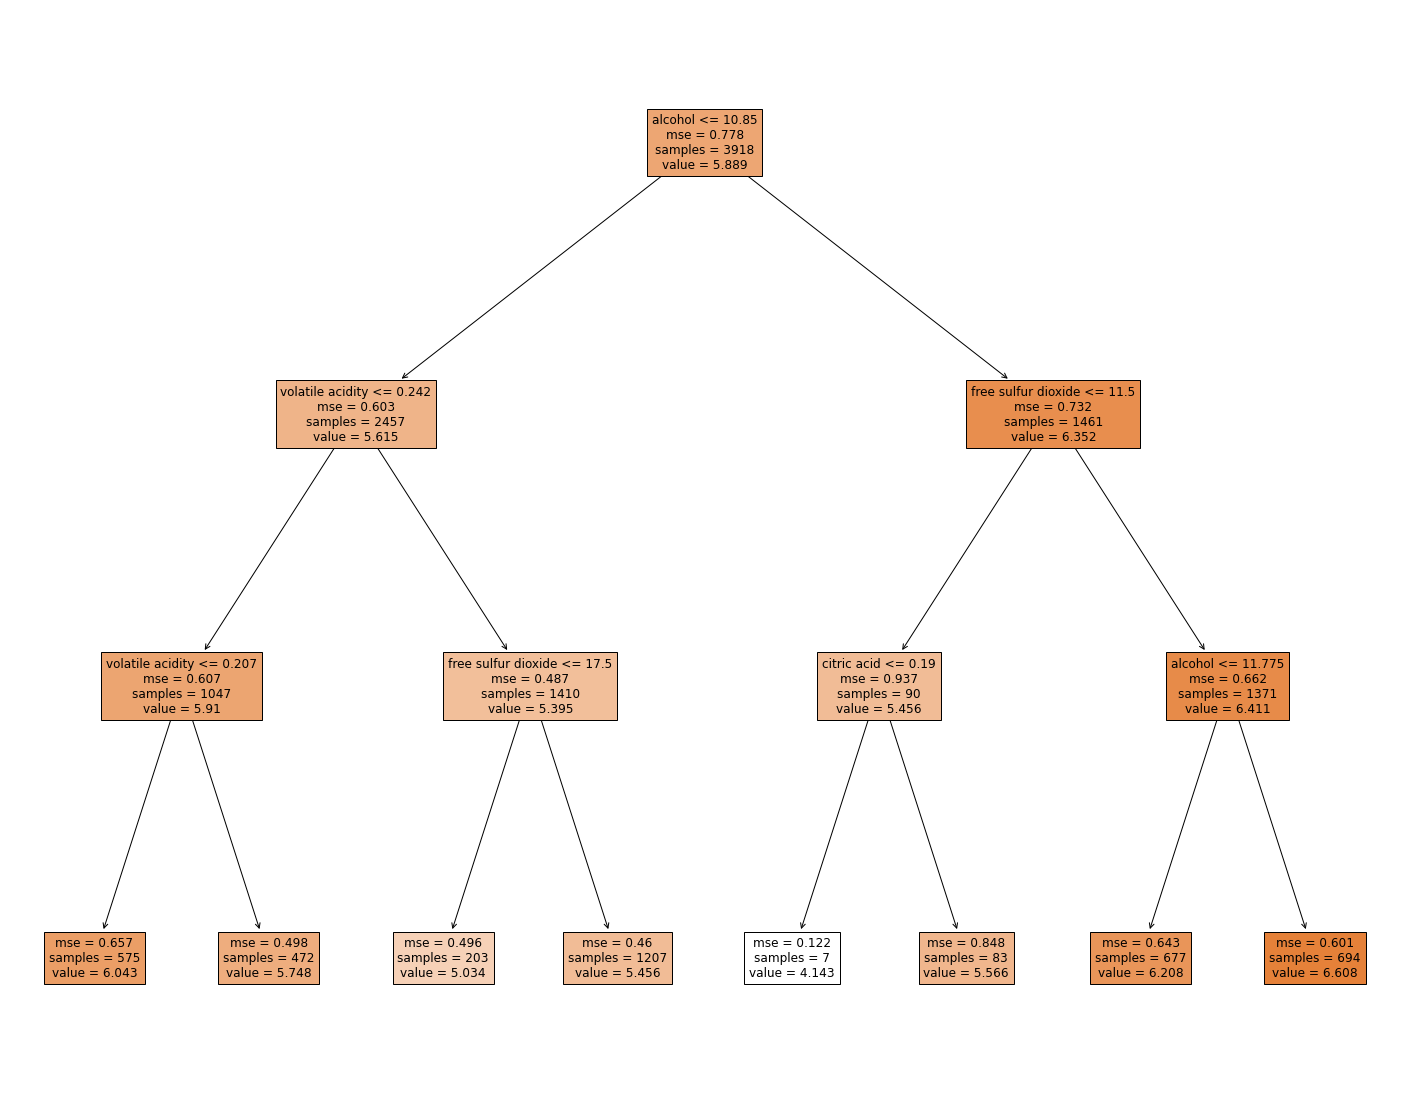

In [36]:
fig = plt.figure(figsize=(25,20))
plot_tree(model, feature_names=df.columns[:-1], filled=True);

In [37]:
# en cada cajita, aparece una "variable" llamada VALUE, 
# que en nuestro caso, representa la calidad del vino.

In [38]:
# level 0: alcohol <= 10.85
# level 1: volatile acidity <= 0.242        free sulfur dioxide <= 11.5
# level 2: volatile acidity <= 0.207   free sulfur dioxide <= 11.5      citric acid ... alcoho

### Huge tree (depth=20)

In [39]:
model = DecisionTreeRegressor(max_depth=20)

In [40]:
model.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=20)

In [41]:
# train error 
mean_squared_error(
    y_true = y_train,
    y_pred = model.predict(X_train)
)

0.004910610155920119

In [42]:
# test error 
mean_squared_error(
    y_true = y_test,
    y_pred = model.predict(X_test)
)

0.6923910811814132

**Something happened?**

El error del conjunto de datos de entrenamiento ha bajado (bastante) pero el error del conjunto de datos de testeo (con el que compruebo si el modelo predice bien) no ha bajado.

Esto quiere decir que el modelo está aprendiendo a hacer solamente lo que hay en los datos de entrenamiento.

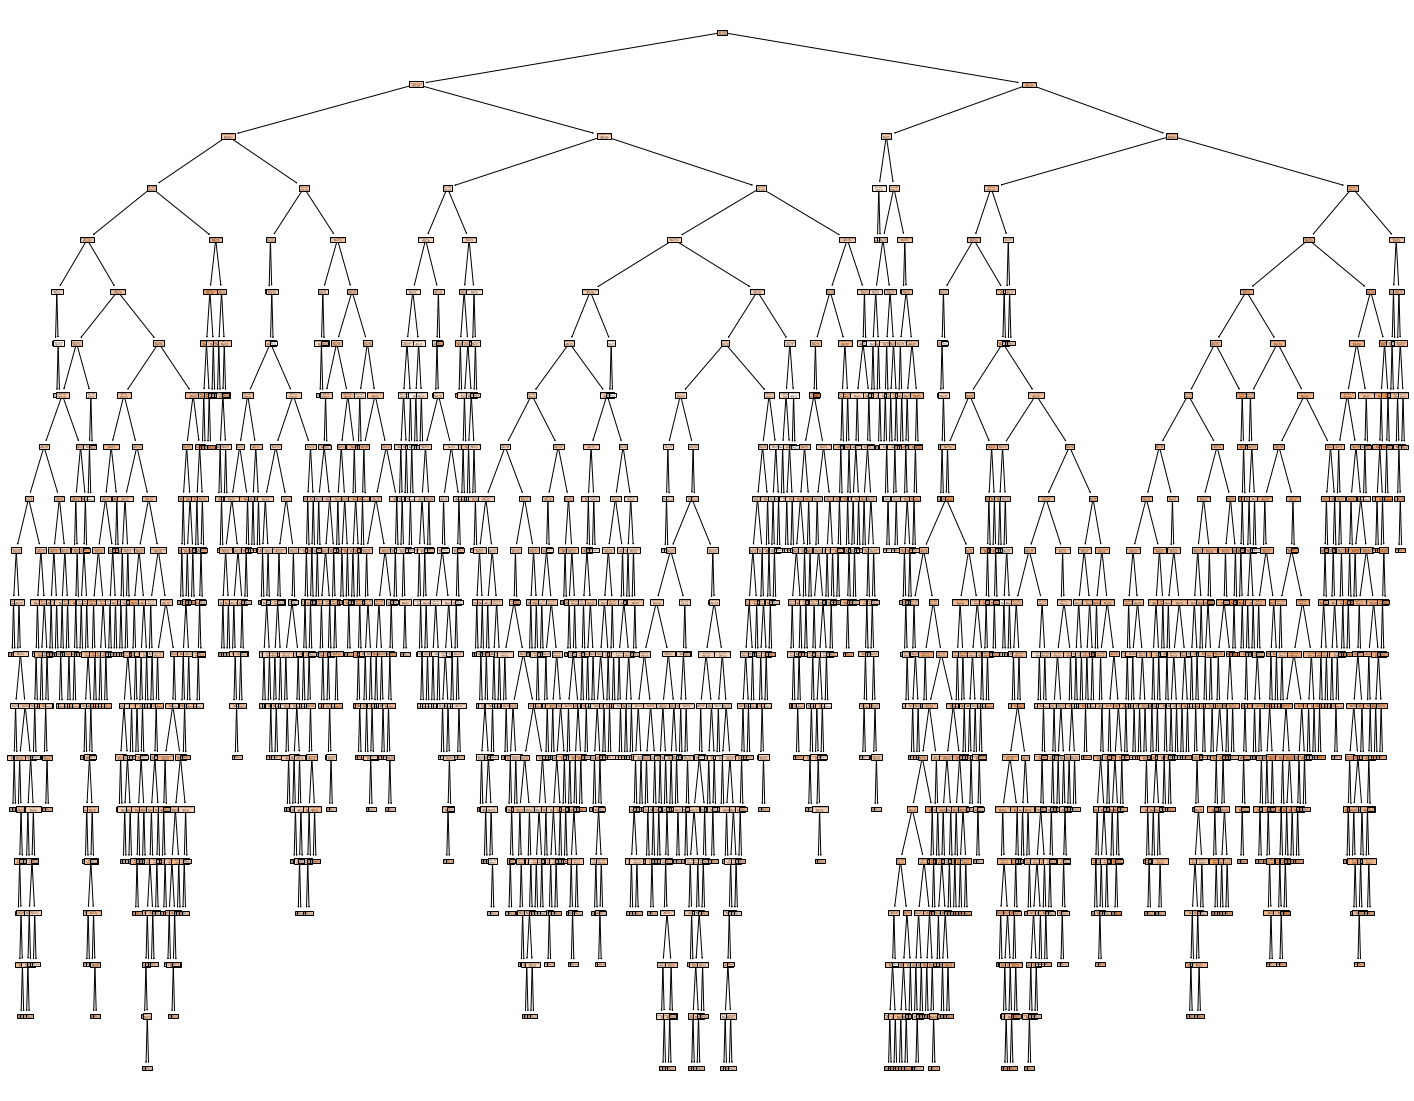

In [43]:
fig = plt.figure(figsize=(25,20))

plot_tree(model, feature_names=df.columns[:-1], filled=True);

In [44]:
fig.savefig("decision_tree.svg", facecolor="white")

### Overfitting

Lets see how training and test error changes with `max_depth`

In [45]:
# va a almacenar los resultados de crear los arboles
results = []

# creamos arboles con profundidad desde 1 hasta 20
for depth in range(1, 21):
    
    # creamos el arbol de decision con la profundidad del bucle for (depth)
    model = DecisionTreeRegressor(max_depth=depth)
    # ajustando los datos de entrenamiento al modelo que hemos creado
    model.fit(X_train, y_train)
    
    # creo un diccionario para para guardar los datos
    result = {
        'depth': depth,
        'train_error': mean_squared_error(y_train, model.predict(X_train)), 
        'test_error':  mean_squared_error(y_test, model.predict(X_test))
    }
    
    # almaceno los datos que acabo de calcular en la variable del principio
    results.append(result)

In [46]:
results_df = pd.DataFrame(results)
results_df

,depth,train_error,test_error
0,1,0.651140,0.685560
1,2,0.590774,0.615895
2,3,0.559806,0.583194
3,4,0.526841,0.552649
4,5,0.491170,0.550328
5,6,0.452954,0.550409
6,7,0.412669,0.566270
7,8,0.373470,0.564607
8,9,0.328421,0.605395
9,10,0.277888,0.626292


In [47]:
results_df[ results_df['test_error'] == results_df['test_error'].min() ]['depth']

4    5
Name: depth, dtype: int64

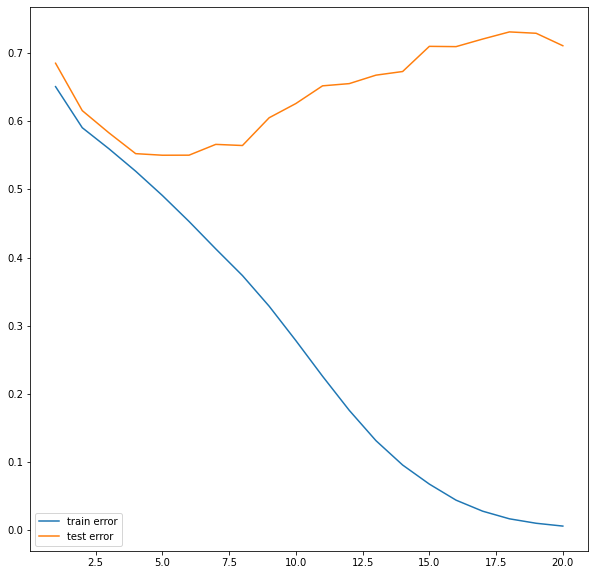

In [48]:
fig = plt.figure(figsize=(10,10))

plt.plot(results_df.depth, results_df.train_error, label='train error')
plt.plot(results_df.depth, results_df.test_error, label='test error')
plt.legend(loc='lower left')

We can see how, when `max_depth` increases above ~5:
 * training error decresases (more precise on training samples)
 * test error increases (model is memorizing training set and not generalizing very well)
 
This is the famous overfitting! And this is why **test error** is the one you should look at!

In [49]:
model = DecisionTreeRegressor(max_depth=6)

### Other hyperparameters

In [50]:
model = DecisionTreeRegressor(max_depth=6, min_samples_split=100, max_features=5)

In [51]:
model.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=6, max_features=5, min_samples_split=100)

In [52]:
print(f"train error: {mean_squared_error(y_train, model.predict(X_train))}")
print(f"test error: {mean_squared_error(y_test, model.predict(X_test))}")

train error: 0.5118974336087203
test error: 0.5762068237873657


`min_samples_split`: the minimum number of samples required to split an internal node  

`max_features`: the number of features to consider when looking for the best split.


Why would you not consider all the features to find a Decision Tree?

# Grid search

Lets find the **best** combination of hyperparameters, i.e. the ones yielding the least test error

In [53]:
from sklearn.model_selection import GridSearchCV 

In [54]:
gs = GridSearchCV(
    estimator=DecisionTreeRegressor(),
    param_grid={
        "max_depth": [2, 4, 6, 8, 10, 12],
        "min_samples_split": [10, 50, 100, 200, 300, 500, 1000],
        "max_features": [5, 7, 9, 11],
    },
    cv=5,  # numero de veces que hace el ajuste
    verbose=3,  # para imprimir cosas por pantalla
    scoring="neg_mean_squared_error",  # metrica que usa
    return_train_score=True
)

In [55]:
%%time
# %% es un "cell magic"
gs.fit(X_train, y_train)

Fitting 5 folds for each of 168 candidates, totalling 840 fits
[CV 1/5] END max_depth=2, max_features=5, min_samples_split=10; total time=   0.0s
[CV 2/5] END max_depth=2, max_features=5, min_samples_split=10; total time=   0.0s
[CV 3/5] END max_depth=2, max_features=5, min_samples_split=10; total time=   0.0s
[CV 4/5] END max_depth=2, max_features=5, min_samples_split=10; total time=   0.0s
[CV 5/5] END max_depth=2, max_features=5, min_samples_split=10; total time=   0.0s
[CV 1/5] END max_depth=2, max_features=5, min_samples_split=50; total time=   0.0s
[CV 2/5] END max_depth=2, max_features=5, min_samples_split=50; total time=   0.0s
[CV 3/5] END max_depth=2, max_features=5, min_samples_split=50; total time=   0.0s
[CV 4/5] END max_depth=2, max_features=5, min_samples_split=50; total time=   0.0s
[CV 5/5] END max_depth=2, max_features=5, min_samples_split=50; total time=   0.0s
[CV 1/5] END max_depth=2, max_features=5, min_samples_split=100; total time=   0.0s
[CV 2/5] END max_depth=

[CV 4/5] END max_depth=2, max_features=11, min_samples_split=200; total time=   0.0s
[CV 5/5] END max_depth=2, max_features=11, min_samples_split=200; total time=   0.0s
[CV 1/5] END max_depth=2, max_features=11, min_samples_split=300; total time=   0.0s
[CV 2/5] END max_depth=2, max_features=11, min_samples_split=300; total time=   0.0s
[CV 3/5] END max_depth=2, max_features=11, min_samples_split=300; total time=   0.0s
[CV 4/5] END max_depth=2, max_features=11, min_samples_split=300; total time=   0.0s
[CV 5/5] END max_depth=2, max_features=11, min_samples_split=300; total time=   0.0s
[CV 1/5] END max_depth=2, max_features=11, min_samples_split=500; total time=   0.0s
[CV 2/5] END max_depth=2, max_features=11, min_samples_split=500; total time=   0.0s
[CV 3/5] END max_depth=2, max_features=11, min_samples_split=500; total time=   0.0s
[CV 4/5] END max_depth=2, max_features=11, min_samples_split=500; total time=   0.0s
[CV 5/5] END max_depth=2, max_features=11, min_samples_split=500;

[CV 1/5] END max_depth=4, max_features=9, min_samples_split=500; total time=   0.0s
[CV 2/5] END max_depth=4, max_features=9, min_samples_split=500; total time=   0.0s
[CV 3/5] END max_depth=4, max_features=9, min_samples_split=500; total time=   0.0s
[CV 4/5] END max_depth=4, max_features=9, min_samples_split=500; total time=   0.0s
[CV 5/5] END max_depth=4, max_features=9, min_samples_split=500; total time=   0.0s
[CV 1/5] END max_depth=4, max_features=9, min_samples_split=1000; total time=   0.0s
[CV 2/5] END max_depth=4, max_features=9, min_samples_split=1000; total time=   0.0s
[CV 3/5] END max_depth=4, max_features=9, min_samples_split=1000; total time=   0.0s
[CV 4/5] END max_depth=4, max_features=9, min_samples_split=1000; total time=   0.0s
[CV 5/5] END max_depth=4, max_features=9, min_samples_split=1000; total time=   0.0s
[CV 1/5] END max_depth=4, max_features=11, min_samples_split=10; total time=   0.0s
[CV 2/5] END max_depth=4, max_features=11, min_samples_split=10; total 

[CV 3/5] END max_depth=6, max_features=7, min_samples_split=300; total time=   0.0s
[CV 4/5] END max_depth=6, max_features=7, min_samples_split=300; total time=   0.0s
[CV 5/5] END max_depth=6, max_features=7, min_samples_split=300; total time=   0.0s
[CV 1/5] END max_depth=6, max_features=7, min_samples_split=500; total time=   0.0s
[CV 2/5] END max_depth=6, max_features=7, min_samples_split=500; total time=   0.0s
[CV 3/5] END max_depth=6, max_features=7, min_samples_split=500; total time=   0.0s
[CV 4/5] END max_depth=6, max_features=7, min_samples_split=500; total time=   0.0s
[CV 5/5] END max_depth=6, max_features=7, min_samples_split=500; total time=   0.0s
[CV 1/5] END max_depth=6, max_features=7, min_samples_split=1000; total time=   0.0s
[CV 2/5] END max_depth=6, max_features=7, min_samples_split=1000; total time=   0.0s
[CV 3/5] END max_depth=6, max_features=7, min_samples_split=1000; total time=   0.0s
[CV 4/5] END max_depth=6, max_features=7, min_samples_split=1000; total t

[CV 2/5] END max_depth=8, max_features=7, min_samples_split=10; total time=   0.0s
[CV 3/5] END max_depth=8, max_features=7, min_samples_split=10; total time=   0.0s
[CV 4/5] END max_depth=8, max_features=7, min_samples_split=10; total time=   0.0s
[CV 5/5] END max_depth=8, max_features=7, min_samples_split=10; total time=   0.0s
[CV 1/5] END max_depth=8, max_features=7, min_samples_split=50; total time=   0.0s
[CV 2/5] END max_depth=8, max_features=7, min_samples_split=50; total time=   0.0s
[CV 3/5] END max_depth=8, max_features=7, min_samples_split=50; total time=   0.0s
[CV 4/5] END max_depth=8, max_features=7, min_samples_split=50; total time=   0.0s
[CV 5/5] END max_depth=8, max_features=7, min_samples_split=50; total time=   0.0s
[CV 1/5] END max_depth=8, max_features=7, min_samples_split=100; total time=   0.0s
[CV 2/5] END max_depth=8, max_features=7, min_samples_split=100; total time=   0.0s
[CV 3/5] END max_depth=8, max_features=7, min_samples_split=100; total time=   0.0s
[

[CV 5/5] END max_depth=8, max_features=11, min_samples_split=500; total time=   0.0s
[CV 1/5] END max_depth=8, max_features=11, min_samples_split=1000; total time=   0.0s
[CV 2/5] END max_depth=8, max_features=11, min_samples_split=1000; total time=   0.0s
[CV 3/5] END max_depth=8, max_features=11, min_samples_split=1000; total time=   0.0s
[CV 4/5] END max_depth=8, max_features=11, min_samples_split=1000; total time=   0.0s
[CV 5/5] END max_depth=8, max_features=11, min_samples_split=1000; total time=   0.0s
[CV 1/5] END max_depth=10, max_features=5, min_samples_split=10; total time=   0.0s
[CV 2/5] END max_depth=10, max_features=5, min_samples_split=10; total time=   0.0s
[CV 3/5] END max_depth=10, max_features=5, min_samples_split=10; total time=   0.0s
[CV 4/5] END max_depth=10, max_features=5, min_samples_split=10; total time=   0.0s
[CV 5/5] END max_depth=10, max_features=5, min_samples_split=10; total time=   0.0s
[CV 1/5] END max_depth=10, max_features=5, min_samples_split=50; 

[CV 5/5] END max_depth=10, max_features=9, min_samples_split=500; total time=   0.0s
[CV 1/5] END max_depth=10, max_features=9, min_samples_split=1000; total time=   0.0s
[CV 2/5] END max_depth=10, max_features=9, min_samples_split=1000; total time=   0.0s
[CV 3/5] END max_depth=10, max_features=9, min_samples_split=1000; total time=   0.0s
[CV 4/5] END max_depth=10, max_features=9, min_samples_split=1000; total time=   0.0s
[CV 5/5] END max_depth=10, max_features=9, min_samples_split=1000; total time=   0.0s
[CV 1/5] END max_depth=10, max_features=11, min_samples_split=10; total time=   0.0s
[CV 2/5] END max_depth=10, max_features=11, min_samples_split=10; total time=   0.0s
[CV 3/5] END max_depth=10, max_features=11, min_samples_split=10; total time=   0.0s
[CV 4/5] END max_depth=10, max_features=11, min_samples_split=10; total time=   0.0s
[CV 5/5] END max_depth=10, max_features=11, min_samples_split=10; total time=   0.0s
[CV 1/5] END max_depth=10, max_features=11, min_samples_spli

[CV 1/5] END max_depth=12, max_features=9, min_samples_split=10; total time=   0.0s
[CV 2/5] END max_depth=12, max_features=9, min_samples_split=10; total time=   0.0s
[CV 3/5] END max_depth=12, max_features=9, min_samples_split=10; total time=   0.0s
[CV 4/5] END max_depth=12, max_features=9, min_samples_split=10; total time=   0.0s
[CV 5/5] END max_depth=12, max_features=9, min_samples_split=10; total time=   0.0s
[CV 1/5] END max_depth=12, max_features=9, min_samples_split=50; total time=   0.0s
[CV 2/5] END max_depth=12, max_features=9, min_samples_split=50; total time=   0.0s
[CV 3/5] END max_depth=12, max_features=9, min_samples_split=50; total time=   0.0s
[CV 4/5] END max_depth=12, max_features=9, min_samples_split=50; total time=   0.0s
[CV 5/5] END max_depth=12, max_features=9, min_samples_split=50; total time=   0.0s
[CV 1/5] END max_depth=12, max_features=9, min_samples_split=100; total time=   0.0s
[CV 2/5] END max_depth=12, max_features=9, min_samples_split=100; total tim

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [2, 4, 6, 8, 10, 12],
                         'max_features': [5, 7, 9, 11],
                         'min_samples_split': [10, 50, 100, 200, 300, 500,
                                               1000]},
             return_train_score=True, scoring='neg_mean_squared_error',
             verbose=3)

In [56]:
grid_search_results = pd.DataFrame(gs.cv_results_)

In [57]:
grid_search_results.columns

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_max_depth', 'param_max_features', 'param_min_samples_split',
       'params', 'split0_test_score', 'split1_test_score', 'split2_test_score',
       'split3_test_score', 'split4_test_score', 'mean_test_score',
       'std_test_score', 'rank_test_score', 'split0_train_score',
       'split1_train_score', 'split2_train_score', 'split3_train_score',
       'split4_train_score', 'mean_train_score', 'std_train_score'],
      dtype='object')

In [58]:
grid_search_results = grid_search_results[['param_max_depth', 'param_max_features', 
                                           'param_min_samples_split', 'mean_test_score', 
                                           'mean_train_score']]

In [59]:
grid_search_results.sort_values('mean_test_score')

,param_max_depth,param_max_features,param_min_samples_split,mean_test_score,mean_train_score
6,2,5,1000,-0.673528,-0.652707
4,2,5,300,-0.652066,-0.645412
5,2,5,500,-0.651835,-0.642482
147,12,7,10,-0.644935,-0.223353
1,2,5,50,-0.644561,-0.618497
...,...,...,...,...,...
137,10,11,300,-0.549377,-0.493556
128,10,9,100,-0.548199,-0.433329
99,8,9,50,-0.547094,-0.419934
78,6,11,50,-0.546989,-0.468557


In [60]:
gs.best_params_

{'max_depth': 10, 'max_features': 5, 'min_samples_split': 200}

## Feature importance

In [61]:
df.columns[:-1]

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object')

In [62]:
vals = pd.Series(gs.best_estimator_.feature_importances_,
         index=df.columns[:-1]).sort_values(ascending=False)
vals

alcohol                 0.514643
volatile acidity        0.133389
free sulfur dioxide     0.098955
residual sugar          0.070304
total sulfur dioxide    0.065523
pH                      0.037601
chlorides               0.029095
fixed acidity           0.026190
citric acid             0.017162
density                 0.007137
sulphates               0.000000
dtype: float64

<AxesSubplot:>

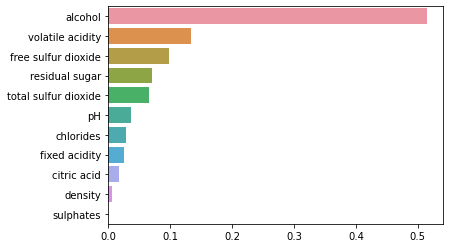

In [63]:
sns.barplot(x=vals.values, y=vals.index)

## Summary

 * Decision trees are useful for regression (`DecisionTreeRegressor`) and classification (`DecisionTreeClassifier`).
 * Their behavior is quite intuitive, interpretable, and explainable.
 
 * Decision trees overfit when `max_depth` becomes very big (too many individual leaves at the end)
 * Prevent overfitting (always, not only in tree based methods) by looking at test error
 
 * One decision tree is often not a very powerful ML algorithm
 * Decision trees are the building blocks of more advanced and superpowerful algorithms

# Trees ensembles

In [64]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

## The problem: detecting breast cancer

In [65]:
df_cancer = pd.read_csv('../data/breast_cancer.csv')

In [66]:
df_cancer

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,mean_fractal_dimension,...,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension,is_cancer
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,1
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,1
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,1
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,1
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,1
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,1
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,1
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,1


In [67]:
X = df_cancer.drop('is_cancer', axis=1)
y = df_cancer['is_cancer']

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=123)

In [68]:
X_train.shape

(455, 30)

## Random forest

Random forests or random decision forests are an ensemble learning method for classification, regression and other tasks that operates by constructing a multitude of decision trees at training time and outputting the class that is the mode of the classes (classification) or mean/average prediction (regression) of the individual trees.

Random decision forests correct for decision trees' habit of overfitting to their training set.

In [69]:
model = RandomForestClassifier()

parameter_space = {
    'n_estimators': [10, 100, 300, 900], # el numero de decision trees en mi random forest
    'max_features': ['sqrt', 0.5, None], # el numero de columnas que coge (si es None, coge todas las columnas)
    'max_depth': [1, 10, 30, 100],       # el numero de niveles en mi decision tree
}

grid_search = GridSearchCV(model,
                           param_grid=parameter_space,
                           verbose=1,
                           cv=5
                          )

In [70]:
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [1, 10, 30, 100],
                         'max_features': ['sqrt', 0.5, None],
                         'n_estimators': [10, 100, 300, 900]},
             verbose=1)

In [71]:
grid_search.best_score_

0.9626373626373625

In [72]:
grid_search.best_params_

{'max_depth': 10, 'max_features': 0.5, 'n_estimators': 900}

## Gradient Boosting

Gradient boosting are specific types of algorithms that take a weak hypothesis or weak learning algorithm and make a series of tweaks to it that will improve the strength of the hypothesis/learner.

The difference between random forest and gradient boosting is the speed at which they reach the optimal solution

In [73]:
# we can fix a set of parameters to be constant, by setting them in the model
model = GradientBoostingClassifier(n_estimators=1000)

params = {
    'learning_rate': [0.1, 0.05, 0.01],
    'max_depth': [4, 6],
    'min_samples_leaf': [3, 9, 17],
    'max_features': [1, 0.3, 0.1]
}

grid_search = GridSearchCV(model,
                           param_grid=params,
                           verbose=1,
                           cv=2
                          )

In [74]:
grid_search.fit(X_train, y_train)

Fitting 2 folds for each of 54 candidates, totalling 108 fits


GridSearchCV(cv=2, estimator=GradientBoostingClassifier(n_estimators=1000),
             param_grid={'learning_rate': [0.1, 0.05, 0.01],
                         'max_depth': [4, 6], 'max_features': [1, 0.3, 0.1],
                         'min_samples_leaf': [3, 9, 17]},
             verbose=1)

### Predicting 

Imagine a patient comes and wants to know if he/she has cancer. You make all the medical tests to obtain the information in the dataframe.

You would create a dataframe as the one below, but I'm just reusing one random sample from the original dataset.

In [107]:
# sample 1 element, remove the column indicating it's cancer or not
new_patient = df_cancer.sample(1).drop('is_cancer', axis=1)
new_patient

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,mean_fractal_dimension,...,worst_radius,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension
225,14.34,13.47,92.51,641.2,0.09906,0.07624,0.05724,0.04603,0.2075,0.05448,...,16.77,16.9,110.4,873.2,0.1297,0.1525,0.1632,0.1087,0.3062,0.06072


Because we have found the best combination of parameters with our grid search, we can use that gradient boosted trees to predict if a patient has cancer or not.

In [111]:
grid_search.best_estimator_

GradientBoostingClassifier(learning_rate=0.01, max_depth=4, max_features=0.3,
                           min_samples_leaf=9, n_estimators=1000)

In [112]:
# the best estimator that grid search found
grid_search.best_estimator_
# the set of parameters for the best estimator
grid_search.best_params_

{'learning_rate': 0.01,
 'max_depth': 4,
 'max_features': 0.3,
 'min_samples_leaf': 9}

We can call directly to the `.predict` method inside the trained `grid_search` object!

In [108]:
grid_search.predict( new_patient )

array([0])

We get a 0, which means that, according to our model, the patient doesn't have cancer.

## References
* [Introduction to Statistical Learning ISL (Chapter 2)](http://faculty.marshall.usc.edu/gareth-james/ISL/ISLR%20Seventh%20Printing.pdf)
* [repo from tdpetrou with materials from ISL](https://github.com/tdpetrou/Machine-Learning-Books-With-Python/tree/master/Introduction%20to%20Statistical%20Learning)

* See [this post](https://towardsdatascience.com/decision-tree-ensembles-bagging-and-boosting-266a8ba60fd9) for an overview of the theory.

* See [StatQuest](https://www.youtube.com/watch?v=3CC4N4z3GJc)  videos on the Boosting

* CheckOut: XGBoost, LightGBM, CatBoost